# Automatic Text Summarization 

**Import Libraries**

In [1]:
import bs4 as bs
import urllib.request as url
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import heapq
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Fetch Articles from Wikipedia**

In [2]:
# web scrape Wikipedia article on Natural Language Processing
scraped_data = url.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')
article = scraped_data.read()
parsed_article = bs.BeautifulSoup(article,'lxml')
paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [3]:
article_text

'Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The result is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves. \nChallenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation.\nNatural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated i

**Text Preprocessing**

In [4]:
# remove square brackets and extra spaces
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)

In [5]:
# remove special characters and digits
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

**Tokenize Sentences**

In [6]:
sentence_list = nltk.sent_tokenize(article_text)

**Find Weighted Frequency of Occurrence**

In [7]:
stopwords = nltk.corpus.stopwords.words('english')

In [8]:
word_frequencies = {}

for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords and word not in punctuation:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [9]:
word_frequencies

{'A': 2,
 'Alan': 1,
 'Already': 1,
 'Challenges': 1,
 'Chinese': 2,
 'Chomskyan': 1,
 'Cognition': 1,
 'Cognitive': 4,
 'Comparative': 1,
 'Computing': 1,
 'Conceptual': 2,
 'Despite': 1,
 'English': 1,
 'For': 2,
 'Function': 1,
 'George': 1,
 'Given': 1,
 'However': 2,
 'In': 3,
 'Increasingly': 1,
 'Intelligence': 1,
 'John': 1,
 'Lakoff': 2,
 'Machinery': 1,
 'Many': 1,
 'Markov': 1,
 'Meaning': 2,
 'Measure': 2,
 'Moore': 1,
 'More': 1,
 'N': 2,
 'NLP': 11,
 'NMT': 1,
 'Natural': 3,
 'PCFG': 1,
 'PF': 1,
 'PMM': 1,
 'Popular': 1,
 'Probabilistic': 1,
 'Probability': 1,
 'Probable': 1,
 'RMM': 1,
 'Relative': 1,
 'SMT': 1,
 'Searle': 1,
 'She': 1,
 'Since': 3,
 'Some': 2,
 'Starting': 1,
 'Stative': 1,
 'Such': 2,
 'That': 1,
 'The': 9,
 'These': 2,
 'This': 2,
 'Though': 1,
 'Tomorrow': 1,
 'Turing': 2,
 'US': 1,
 'Up': 1,
 'When': 2,
 'Where': 1,
 'abandoned': 1,
 'accurately': 1,
 'achieve': 1,
 'acquiring': 1,
 'action': 1,
 'additional': 1,
 'advantage': 1,
 'advantages': 1,


In [10]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

In [11]:
word_frequencies

{'A': 0.07142857142857142,
 'Alan': 0.03571428571428571,
 'Already': 0.03571428571428571,
 'Challenges': 0.03571428571428571,
 'Chinese': 0.07142857142857142,
 'Chomskyan': 0.03571428571428571,
 'Cognition': 0.03571428571428571,
 'Cognitive': 0.14285714285714285,
 'Comparative': 0.03571428571428571,
 'Computing': 0.03571428571428571,
 'Conceptual': 0.07142857142857142,
 'Despite': 0.03571428571428571,
 'English': 0.03571428571428571,
 'For': 0.07142857142857142,
 'Function': 0.03571428571428571,
 'George': 0.03571428571428571,
 'Given': 0.03571428571428571,
 'However': 0.07142857142857142,
 'In': 0.10714285714285714,
 'Increasingly': 0.03571428571428571,
 'Intelligence': 0.03571428571428571,
 'John': 0.03571428571428571,
 'Lakoff': 0.07142857142857142,
 'Machinery': 0.03571428571428571,
 'Many': 0.03571428571428571,
 'Markov': 0.03571428571428571,
 'Meaning': 0.07142857142857142,
 'Measure': 0.07142857142857142,
 'Moore': 0.03571428571428571,
 'More': 0.03571428571428571,
 'N': 0.07142

**Frequency Distribution**

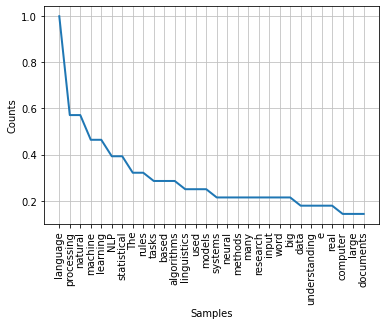

In [12]:
frequency_dist = nltk.FreqDist(word_frequencies)
frequency_dist.plot(30)

**Calculate Sentence Scores**

In [13]:
sentence_scores = {}

for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [14]:
sentence_scores

{'A coarse division is given below.': 0.14285714285714285,
 'A major drawback of statistical methods is that they require elaborate feature engineering.': 0.8571428571428571,
 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation.': 4.25,
 'Cognition refers to "the mental action or process of acquiring knowledge and understanding through thought, experience, and the senses."': 0.6071428571428571,
 'Cognitive linguistics is an interdisciplinary branch of linguistics, combining knowledge and research from both psychology and linguistics.': 1.3571428571428572,
 'Cognitive science is the interdisciplinary, scientific study of the mind and its processes.': 0.4642857142857142,
 'For example, consider some of the meanings, in English, of the word “big”.': 0.5714285714285714,
 'However, they continue to be relevant for contexts in which statistical interpretability and transparency is required.': 0.6785

**Extract Output Summary**

In [15]:
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)

In [16]:
summary

'Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation. Up to the 1980s, most natural language processing systems were based on complex sets of hand-written rules. The cache language models upon which many speech recognition systems now rely are examples of such statistical models. The following is a list of some of the most commonly researched tasks in natural language processing. Though natural language processing tasks are closely intertwined, they can be subdivided into categories for convenience. Some of the earliest-used machine learning algorithms, such as decision trees, produced systems of hard if-then rules similar to existing hand-written rules.'